# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
print (cities)

['vaini', 'petropavlovsk-kamchatskiy', 'tiksi', 'rikitea', 'saint george', 'dikson', 'punta arenas', 'touros', 'kunda', 'provideniya', 'sorvag', 'bogoroditsk', 'huainan', 'athabasca', 'launceston', 'dharchula', 'butaritari', 'hesla', 'khatanga', 'sahrak', 'georgetown', 'saint-philippe', 'albany', 'illoqqortoormiut', 'asau', 'hobart', 'norman wells', 'cabo san lucas', 'barentsburg', 'maldonado', 'busselton', 'chokurdakh', 'haapu', 'narsaq', 'sitka', 'hilo', 'hithadhoo', 'kenitra', 'russell', 'east london', 'tasiilaq', 'viksoyri', 'mys shmidta', 'ayodhya', 'ushuaia', 'kapaa', 'qaqortoq', 'saint-augustin', 'port blair', 'new norfolk', 'salinas', 'khani', 'sobolevo', 'ostrovnoy', 'airai', 'katsuura', 'carnarvon', 'talawdi', 'ballina', 'hermanus', 'mareeba', 'tuatapere', 'mataura', 'bethel', 'avarua', 'thunder bay', 'haines junction', 'sovetskiy', 'baculin', 'grand gaube', 'manturovo', 'saskylakh', 'upington', 'bereda', 'yellowknife', 'jablah', 'lokachi', 'morro agudo', 'clyde river', 'asil

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

for c in range(len(cities)):  
    query_url = f"{url}appid={api_key}&units={units}&q={cities[c]}"
    print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=vaini
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=tiksi
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=saint george
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=dikson
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&units=imperial&q=touros
http://api.openweathermap.org/data/2.5/weather?appid=ddd9c192cd37b55a97484b829d0762a8&unit

In [5]:
city,clouds,country, date= [],[],[],[]
humidity, lat, lng, temp,wind = [],[],[],[],[]

for c in range (len(cities)):  
    query_url = f"{url}appid={api_key}&units={units}&q={cities[c]}"
    temperature =requests.get(query_url)
    try:
        temperature_json = temperature.json()
        clouds.append(temperature_json['clouds']['all'])
        country.append(temperature_json['sys']['country'])
        city.append(temperature_json['name'])
        date.append(temperature_json['dt'])
        humidity.append(temperature_json['main']['humidity'])
        lat.append(temperature_json['coord']['lat'])
        lng.append(temperature_json['coord']['lon']) 
        temp.append(temperature_json['main']['temp_max'])
        wind.append(temperature_json['wind']['speed'])
    except:
        print("skipping invalid data")
        continue
        #pprint(temperature_json)
  
    

skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping invalid data
skipping i

In [6]:
weather_dict = {
    "City" : city,
    "Cloudiness" : clouds,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,                 
    "Max Temp" : temp,
    "Wind Speed" : wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,100,IN,1563576364,91,15.34,74.49,76.84,0.94
1,Petropavlovsk-Kamchatskiy,20,RU,1563576365,77,53.05,158.65,66.20,6.71
2,Tiksi,89,RU,1563576365,42,71.64,128.87,53.07,10.71
3,Rikitea,80,PF,1563576248,59,-23.12,-134.97,66.57,13.49
4,Saint George,20,GR,1563576367,73,39.45,22.34,75.00,2.21


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv('weather_analysis.csv')

In [8]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,100,IN,1563576364,91,15.34,74.49,76.84,0.94
1,Petropavlovsk-Kamchatskiy,20,RU,1563576365,77,53.05,158.65,66.20,6.71
2,Tiksi,89,RU,1563576365,42,71.64,128.87,53.07,10.71
3,Rikitea,80,PF,1563576248,59,-23.12,-134.97,66.57,13.49
4,Saint George,20,GR,1563576367,73,39.45,22.34,75.00,2.21


In [9]:
weather_data.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max Temp', 'Wind Speed'],
      dtype='object')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

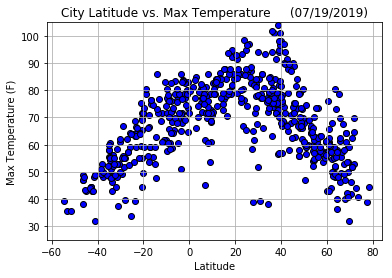

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
            
plt.title("City Latitude vs. Max Temperature     (07/19/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True) 

plt.ylim(25, 105)
plt.xlim(-62,84)
           
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

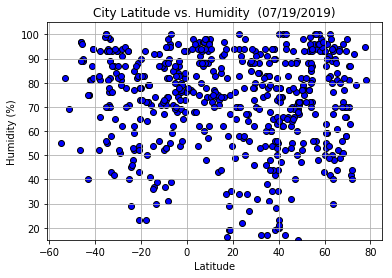

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o" , facecolors="blue", edgecolors="black")
            
plt.title("City Latitude vs. Humidity  (07/19/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True) 

plt.ylim(15, 105)
plt.xlim(-61,85)
           
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

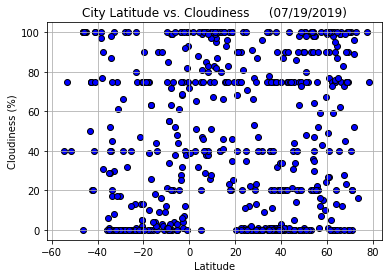

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o" , facecolors="blue", edgecolors="black")
            
plt.title("City Latitude vs. Cloudiness     (07/19/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)  

plt.ylim(-5, 105)
plt.xlim(-62,84)
           
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

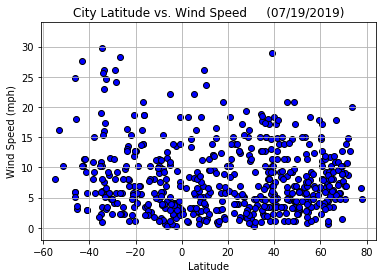

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
            
plt.title("City Latitude vs. Wind Speed     (07/19/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)  

plt.ylim(-2,34)
plt.xlim(-61,84)
           
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

In [ ]:
1.As expected in general, the temperature gets hotter as you go closer to the 0 latitude. 
2.Highest temperatures can be found between the latitudes 20 - 40. 
3.Wind speed, cloudiness and humidity have no corrolation with latitude 
